In [1]:
import numpy as np
import pandas as pd
import shap
from joblib import load
import seaborn as sns

# Model Explanations using SHAP and Scikit-Learn's Feature Importances

### Quant Indicators Only

In [2]:
df = pd.read_csv('data/processed/final_clean_data.csv')
model = load('models/quant.joblib')

# Roundabout way to create a df to test the quant model on
X_q_test = np.load('data/split/X_q_test.npy')
quant_cols = df.drop(columns = 'market_value_').columns[1:9]
df_quant = pd.DataFrame(X_q_test, columns = quant_cols)

In [3]:
df_quant.head()

,total_comp_income_,dividends_,revenue_,stockholders_equity_,delta_comprehensive_income_,delta_revenue_,delta_stockholders_equity_,delta_market_value_
0,0.022921,0.000154,0.000125,0.030213,0.594043,0.000416,0.007672,0.002856
1,0.023879,0.004265,0.002011,0.040653,0.593553,0.000446,0.007659,0.003712
2,0.022948,0.000000,0.000569,0.030131,0.593401,0.000429,0.007693,0.002513
3,0.022699,0.000000,0.000111,0.029611,0.634683,0.000379,0.007573,0.001821
4,0.022161,0.000000,0.000034,0.029622,0.606108,0.153963,0.007084,0.013085


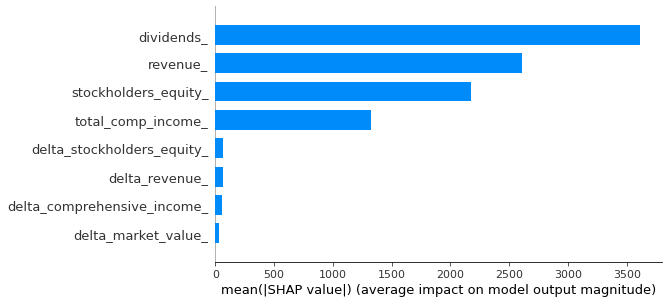

In [4]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_quant)

shap.summary_plot(shap_values, df_quant, show=True, plot_type = 'bar')

The deltas seem to have a negligible effect on the model's predictions.

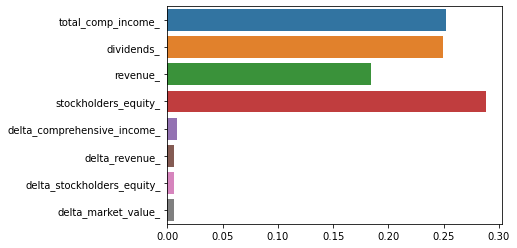

In [5]:
sns.barplot(model.feature_importances_, quant_cols)

The general conclusion is shared by SHAP and the model-internal feature importances, though the ordering is somewhat different.

### Document Vectors Only

In [6]:
model = load('models/nlp.joblib')

# Roundabout way to create a df to test the quant model on
X_n_test = np.load('data/split/X_n_test.npy')
nlp_cols = df.drop(columns = 'market_value_').columns[9:]
df_nlp = pd.DataFrame(X_n_test, columns = nlp_cols)

In [7]:
df_nlp.head()

,doc2vec_dim_1,doc2vec_dim_2,doc2vec_dim_3,doc2vec_dim_4,doc2vec_dim_5,doc2vec_dim_6,doc2vec_dim_7,doc2vec_dim_8,doc2vec_dim_9,doc2vec_dim_10,...,doc2vec_dim_21,doc2vec_dim_22,doc2vec_dim_23,doc2vec_dim_24,doc2vec_dim_25,doc2vec_dim_26,doc2vec_dim_27,doc2vec_dim_28,doc2vec_dim_29,doc2vec_dim_30
0,0.333451,0.150232,0.365855,0.882022,0.457264,0.340447,0.346093,0.173750,0.738841,0.534735,...,0.317359,0.504602,0.308025,0.542977,0.311622,0.202016,0.590844,0.472246,0.858591,0.354528
1,0.464182,0.106414,0.434508,0.702151,0.400943,0.412723,0.352839,0.308373,0.762803,0.712802,...,0.331877,0.455108,0.369899,0.417585,0.261943,0.219723,0.578895,0.215975,0.746456,0.223098
2,0.716097,0.523217,0.260437,0.571807,0.430463,0.491998,0.567765,0.247231,0.437465,0.245522,...,0.479515,0.598055,0.577836,0.477799,0.466990,0.172932,0.683397,0.661264,0.718271,0.738255
3,0.460765,0.716986,0.677778,0.495910,0.505833,0.555778,0.544738,0.296279,0.253870,0.332148,...,0.526738,0.519124,0.397036,0.227386,0.369590,0.197361,0.525447,0.339361,0.586699,0.449820
4,0.473784,0.840211,0.574311,0.383935,0.495379,0.417596,0.697857,0.195485,0.287527,0.294997,...,0.569722,0.759568,0.516727,0.471543,0.631501,0.323762,0.457842,0.511130,0.607926,0.939539


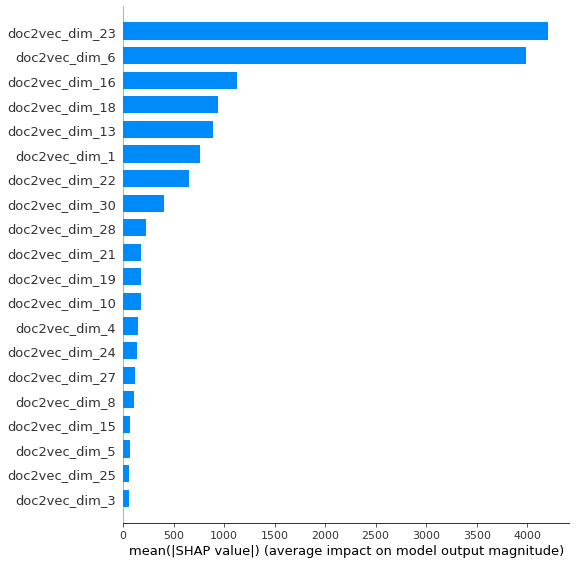

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_nlp)

shap.summary_plot(shap_values, df_nlp, show=True, plot_type = 'bar')

Interestingly, two features seem to have a much larger impact on the model than the rest.

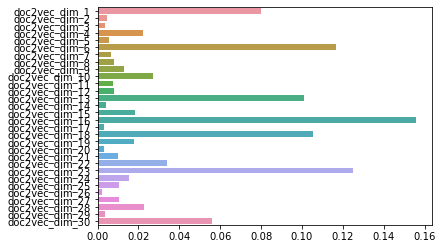

In [9]:
sns.barplot(model.feature_importances_, nlp_cols)

This messy graphic tells a very different story. While dimensions 6 and 23 are also prevalent, a few others are similarly high, and one supersedes them. I'll look into this when I have more time.

### All Features

The central question is whether the NLP features are still important in the combined model. From the scores of the models, we're led to assume they are, given the combined model outperformed both others by some margin.

In [10]:
model = load('models/comb.joblib')

# Roundabout way to create a df to test the quant model on
X_test = np.load('data/split/X_test.npy')
cols = df.drop(columns = 'market_value_').columns[1:]
df_comb = pd.DataFrame(X_test, columns = cols)

In [11]:
df_comb.head()

,total_comp_income_,dividends_,revenue_,stockholders_equity_,delta_comprehensive_income_,delta_revenue_,delta_stockholders_equity_,delta_market_value_,doc2vec_dim_1,doc2vec_dim_2,...,doc2vec_dim_21,doc2vec_dim_22,doc2vec_dim_23,doc2vec_dim_24,doc2vec_dim_25,doc2vec_dim_26,doc2vec_dim_27,doc2vec_dim_28,doc2vec_dim_29,doc2vec_dim_30
0,0.022921,0.000154,0.000125,0.030213,0.594043,0.000416,0.007672,0.002856,0.333451,0.150232,...,0.317359,0.504602,0.308025,0.542977,0.311622,0.202016,0.590844,0.472246,0.858591,0.354528
1,0.023879,0.004265,0.002011,0.040653,0.593553,0.000446,0.007659,0.003712,0.464182,0.106414,...,0.331877,0.455108,0.369899,0.417585,0.261943,0.219723,0.578895,0.215975,0.746456,0.223098
2,0.022948,0.000000,0.000569,0.030131,0.593401,0.000429,0.007693,0.002513,0.716097,0.523217,...,0.479515,0.598055,0.577836,0.477799,0.466990,0.172932,0.683397,0.661264,0.718271,0.738255
3,0.022699,0.000000,0.000111,0.029611,0.634683,0.000379,0.007573,0.001821,0.460765,0.716986,...,0.526738,0.519124,0.397036,0.227386,0.369590,0.197361,0.525447,0.339361,0.586699,0.449820
4,0.022161,0.000000,0.000034,0.029622,0.606108,0.153963,0.007084,0.013085,0.473784,0.840211,...,0.569722,0.759568,0.516727,0.471543,0.631501,0.323762,0.457842,0.511130,0.607926,0.939539


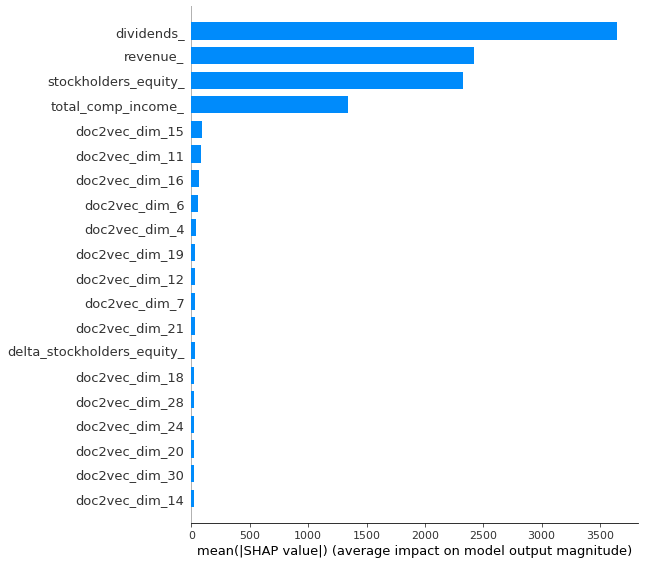

In [12]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_comb)

shap.summary_plot(shap_values, df_comb, show=True, plot_type = 'bar')

Whoops! That's looking pretty clear now.

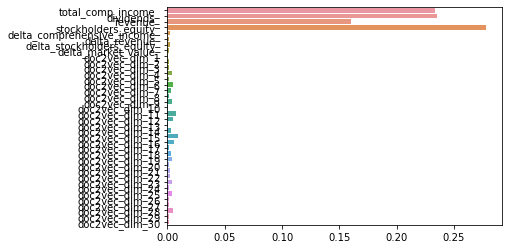

In [13]:
sns.barplot(model.feature_importances_, cols)

And again, fairly little disagreement here. The document vectors become extremely minor features. The key question, then, is why the NLP model performed so well (test R2 of 0.81) if all the features are so insignificant in a combined model.